In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Read the airbnb data
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')

/tmp/ipython-input-2710287626.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')


# Access the Data

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [7]:
#Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,06/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [12]:
#drop duplicate records
df.drop_duplicates(inplace = True)

#drop house_rules and license clumns with insufficient data
# df.drop(['house_rules', 'license'], axis=1, inplace=True) # This line caused an error

#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex= False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex = False)

#Remove all comas in the price and service fee columns
df['price'] = df['price'].str.replace(',', '', regex= False)
df['service fee'] = df['service fee'].str.replace(',', '', regex = False)

#Correct the spelling of 'brookln to 'Brooklyn'
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn')

#Change all mismatched data types to the appropriate once
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])

# Drop rows with missing values in 'Construction year' before converting to int
df.dropna(subset=['Construction year'], inplace=True)
df['Construction year'] = df['Construction year'].astype(int)


#Drop all records with missing values
df.dropna(inplace = True)

#Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)

#Rename the price and service fee columns to include a dollar sign
df.rename(columns = {
    'price': 'price$',
    'service fee': 'service fee$'
}, inplace = True)

In [13]:
df.duplicated().value_counts()

,count
False,83411


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

# Exploratary Data Analysis(EDA)

## Summary Statistics

In [15]:
df.describe()

,lat,long,Construction year,price$,service fee$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


### What are the different property types in the Dataset?

In [16]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


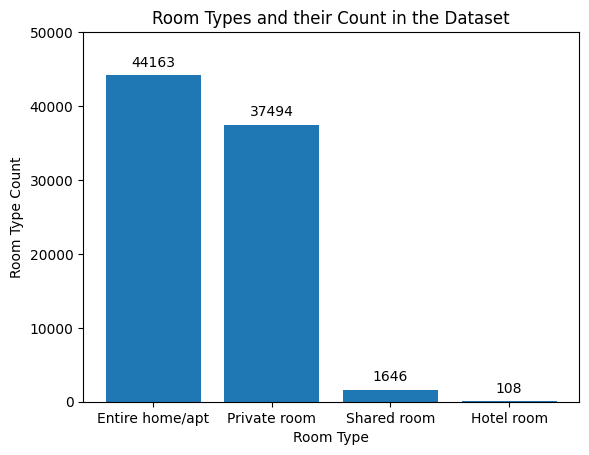

In [17]:
#Room type count plotted on a chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"] );
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel("Room Type");
plt.ylabel("Room Type Count");
plt.title("Room Types and their Count in the Dataset");

### Which neighbourhood group has the highest number of listings?

In [18]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


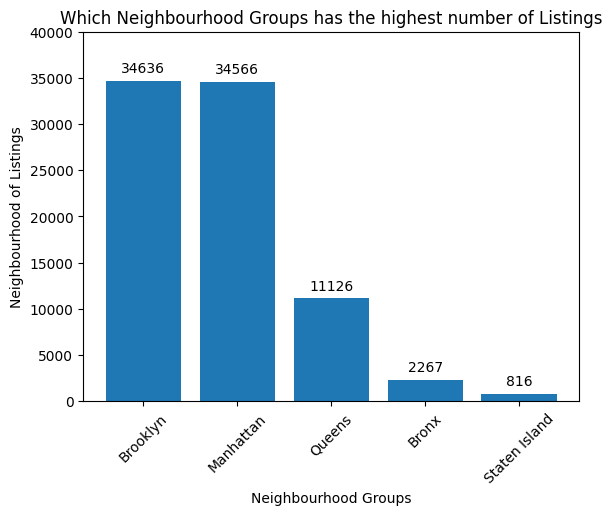

In [21]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"] );
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4);
plt.ylim([0,40000]);
plt.xlabel("Neighbourhood Groups");
plt.ylabel("Neighbourhood of Listings");
plt.xticks(rotation = 45);
plt.title("Which Neighbourhood Groups has the highest number of Listings");

### Which neighbourhood groups have the highest average prices for Airbnb listings?

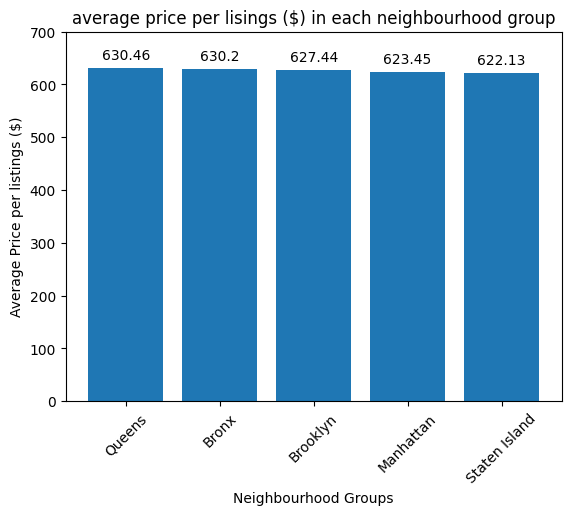

In [22]:
avg_price = df.groupby('neighbourhood group')['price$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price$"] );
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel("Neighbourhood Groups");
plt.ylabel("Average Price per listings ($)");
plt.xticks(rotation = 45);
plt.title("average price per lisings ($) in each neighbourhood group");

### Is there a relationship between the construction year of property and price?

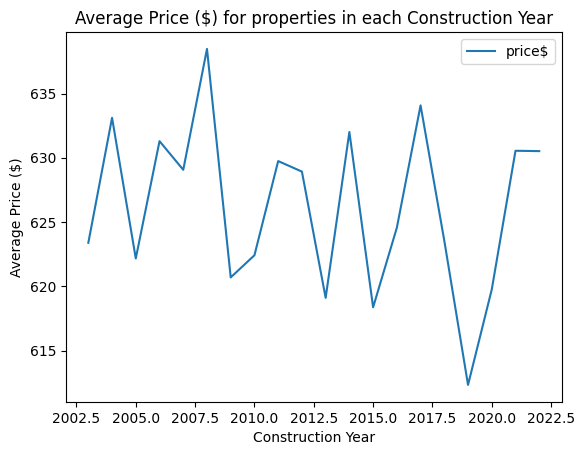

In [26]:
df.groupby(df['Construction year'])['price$'].mean().to_frame().plot();
plt.xlabel("Construction Year");
plt.ylabel("Average Price ($)");
plt.title("Average Price ($) for properties in each Construction Year");

### Who are the top 10 hosts by calculated host listing count?

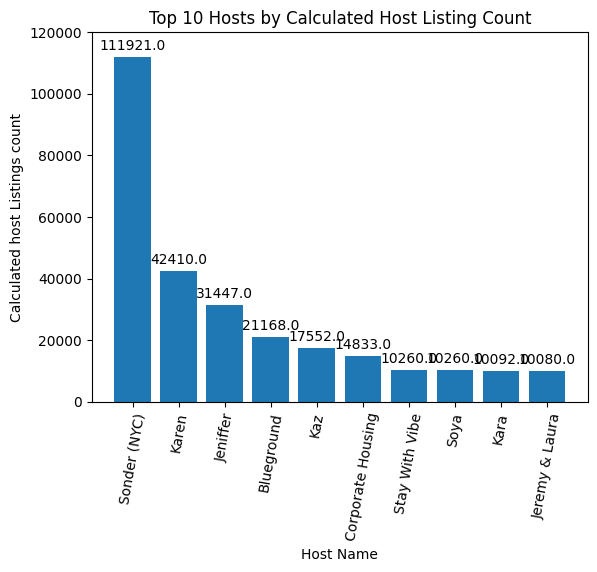

In [27]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"] );
plt.bar_label(hosts_bar, labels = hosts.loc[:,"calculated host listings count"], label_type = 'edge', padding = 3);
plt.xlabel("Host Name");
plt.ylabel("Calculated host Listings count");
plt.xticks(rotation = 80);
plt.ylim([0,120000]);
plt.title("Top 10 Hosts by Calculated Host Listing Count");

### Are hosts with verified identities more likely to receice positive reviews?

In [28]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


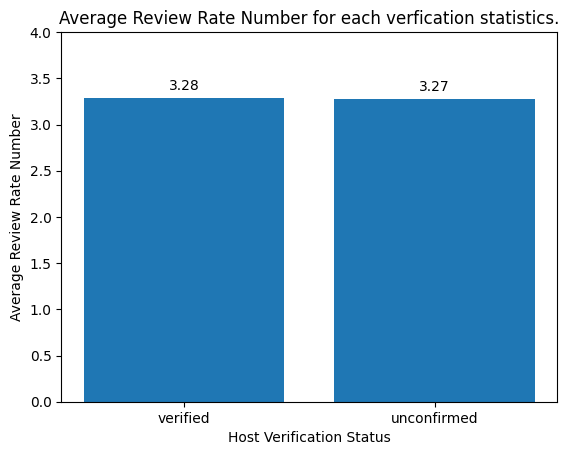

In [29]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"] );
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each verfication statistics.');

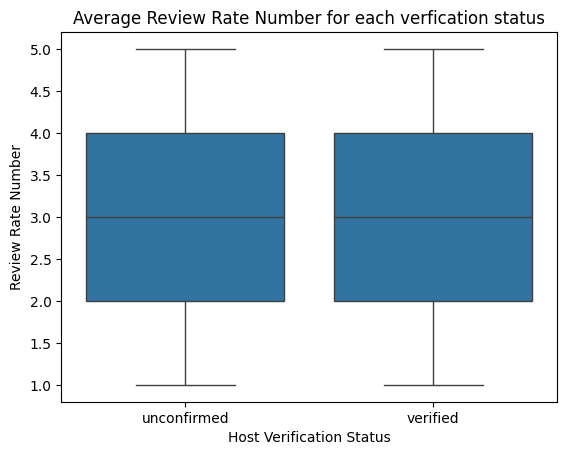

In [30]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate Number for each verfication status');

Is there a correlation between the price of a listing and its service fee?

In [38]:
df['price$'].corr(df['service fee$']);

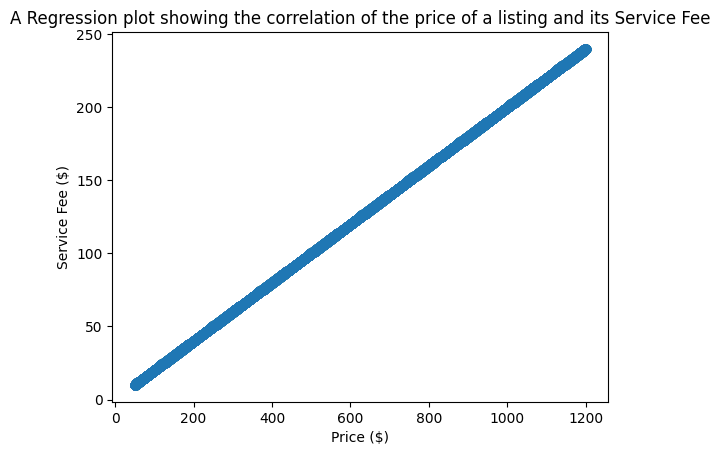

In [39]:
sns.regplot(df, x = 'price$', y = 'service fee$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression plot showing the correlation of the price of a listing and its Service Fee');
#

### What is the average review rate number(e.g., stars) for listings, and does it vary based on the neighbourhood group and room type?

In [40]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

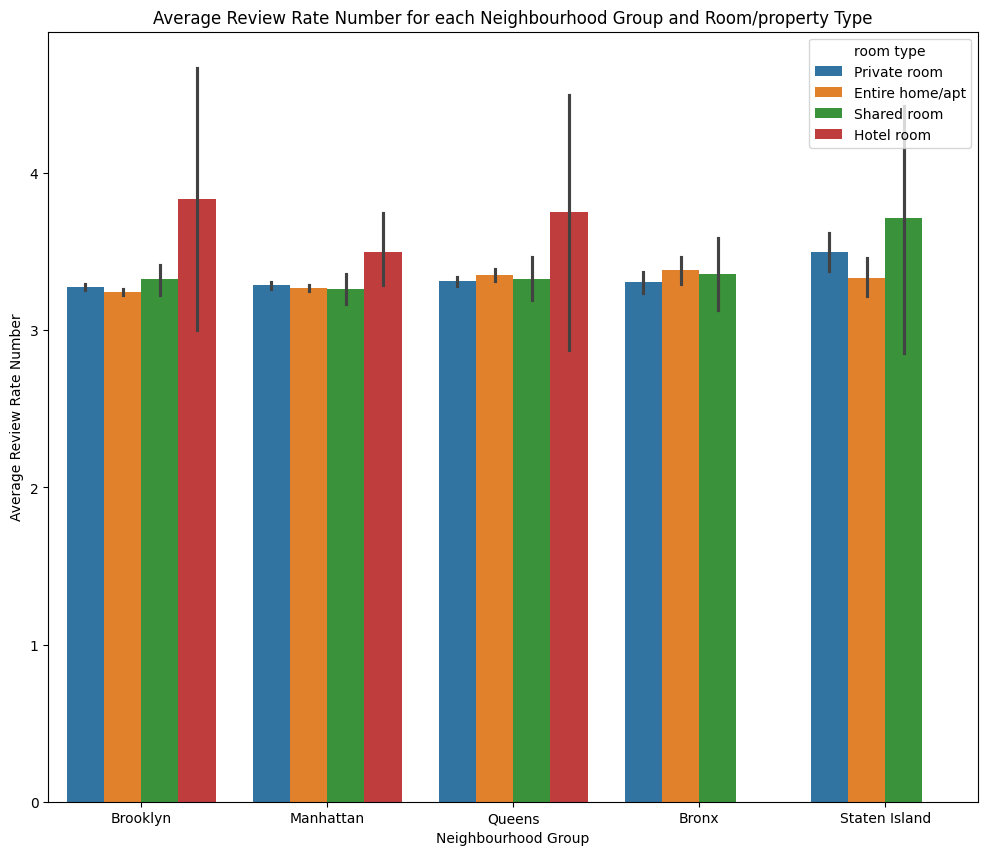

In [41]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Neighbourhood Group and Room/property Type');


### Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

Text(0.5, 1.0, 'A Regression plot showing the correlation of the calculated host listings count and its availability')

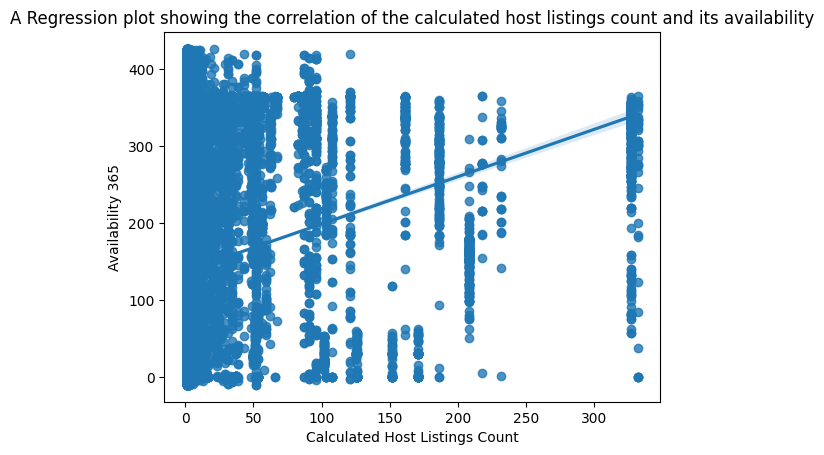

In [42]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365');
plt.title('A Regression plot showing the correlation of the calculated host listings count and its availability')

In [45]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)